In [1]:
# coding: utf-8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def mnist_show_digit(digit=0, train=True):
    if train:
        x = mnist.train.images[digit]
        print('[i] number of bytes representing image: ', len(x), 'bytes')
        print('[i] number of images: ', len(mnist.train.images))
        print('[i] showing digit: ', digit)
        x = x.reshape([28, 28])
        plt.imshow(x, cmap='hot', interpolation='nearest')
        plt.show()
        print('hot vector: ', mnist.train.labels[digit])
    else:
        x = mnist.test.images[digit]
        print('[i] number of bytes representing image: ', len(x), 'bytes')
        print('[i] number of images: ', len(mnist.train.images))
        print('[i] showing digit: ', digit)
        x = x.reshape([28, 28])
        plt.imshow(x, cmap='hot', interpolation='nearest')
        plt.show()
        print('hot vector: ', mnist.test.labels[digit])

[i] number of bytes representing image:  1 bytes
[i] number of images:  55000
[i] showing digit:  [50090]


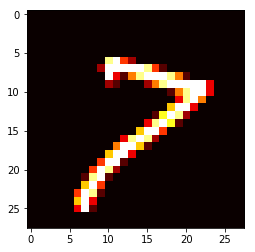

hot vector:  [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [4]:
train_item = np.random.randint(len(mnist.train.images), size=1)
mnist_show_digit(train_item, train = True)

In [5]:
def get_hotvmax_pos_fast(hot_vector):
    ''' with the max fn the algorithm proved to be 2x shorter 
        and 7x faster than the traditional approach '''
    predition_max = max(hot_vector)
    for pos in range(len(hot_vector)):
        if hot_vector[pos] == predition_max:
            return pos

In [6]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        print('[i] creating layer, ', name, ' with ', n_inputs, ' neurons...')
        stddev = 2 / np.sqrt(n_inputs)
        
        W = tf.Variable(tf.truncated_normal((n_inputs, n_neurons), \
            stddev=stddev), name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.add(tf.matmul(X, W), b)
        
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [7]:
n_inputs = 28 * 28 # mnist array
n_hidden1 = 300    # first hidden layer
n_hidden2 = 100    # second hidden layer
n_outputs = 10     # hot vector output

In [8]:
with  tf.name_scope('input'):
    input_x = tf.placeholder(tf.float32, shape=(None, n_inputs), name='x')

with  tf.name_scope('target'):
    target_y = tf.placeholder(tf.float32, [None, 10])
    #target_y = tf.placeholder(tf.int8, shape=(None), name='y')

with tf.name_scope('nn'):
    hidden1 = neuron_layer(input_x, n_hidden1, 'hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, 'hidden2', activation=tf.nn.relu)
    prediction = neuron_layer(hidden2, n_outputs, 'output')

print('[i] input Tensor is [', input_x.get_shape()[0], ',', input_x.get_shape()[1], ']')
print('[i] where [instance_of_data, data_object]')

with tf.name_scope('cost'):
    cost = tf.nn.l2_loss(prediction - target_y)
    
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

[i] creating layer,  hidden1  with  784  neurons...
[i] creating layer,  hidden2  with  300  neurons...
[i] creating layer,  output  with  100  neurons...
[i] input Tensor is [ ? , 784 ]
[i] where [instance_of_data, data_object]


In [9]:
def mnist_test():
    correct_predictions = 0
    for test_item in range(len(mnist.test.images)):
        
        predicted_label = sess.run(prediction, 
            feed_dict={input_x: mnist.test.images[test_item] [None, :]})

        guess = get_hotvmax_pos_fast(predicted_label[0])
        truth = get_hotvmax_pos_fast(mnist.test.labels[test_item])
    
        if guess == truth:
            correct_predictions = correct_predictions + 1.0
    
    print('[i] total correct predictions is: ', correct_predictions)
    print('[i] total data in test dataset is: ', len(mnist.test.images))
    print('[i] success of the model is: ', 
        correct_predictions / len(mnist.test.images) * 100, '%')
    print('[i] error of the model is: ',
          100.0 - (correct_predictions / len(mnist.test.images)) * 100, '%')
    print('[i] TEST finished...')

In [10]:
cost_function_result_aggregated = 1000.0
training_epoch = -1

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    while cost_function_result_aggregated > 0.1: #0.1:
        training_epoch = training_epoch + 1
        
        cost_function_result_aggregated = 0
        for batch_epoch in range(0, 100):
            
            train_item = np.random.randint(len(mnist.train.images), size=1)
            _, predicted_label, cost_function_result = \
                sess.run([optimizer, prediction, cost], \
                feed_dict = {input_x:  mnist.train.images[train_item], \
                             target_y: mnist.train.labels[train_item]})

            cost_function_result_aggregated = \
                cost_function_result_aggregated + cost_function_result 
        
        if training_epoch % 500 == 0:
            print('[i] cost_function_result_aggregated: ', \
                  cost_function_result_aggregated)
            
    print('[i] final cost_function_result_aggregated: ', \
          cost_function_result_aggregated)
    print('[i] TRAINING finished...')
    mnist_test()

[i] cost_function_result_aggregated:  96.5342834741
[i] cost_function_result_aggregated:  4.49894461448
[i] cost_function_result_aggregated:  1.73838173742
[i] cost_function_result_aggregated:  3.368030029
[i] cost_function_result_aggregated:  3.19761844028
[i] cost_function_result_aggregated:  1.90343761235
[i] cost_function_result_aggregated:  1.98766351628
[i] cost_function_result_aggregated:  0.86762309225
[i] cost_function_result_aggregated:  1.56331591361
[i] cost_function_result_aggregated:  1.436716418
[i] cost_function_result_aggregated:  1.05380109375
[i] cost_function_result_aggregated:  1.17770652781
[i] cost_function_result_aggregated:  0.906995932281
[i] cost_function_result_aggregated:  0.660714119505
[i] cost_function_result_aggregated:  0.569099569188
[i] cost_function_result_aggregated:  0.905075157481
[i] cost_function_result_aggregated:  0.804916857442
[i] cost_function_result_aggregated:  1.05706421671
[i] cost_function_result_aggregated:  0.908453519607
[i] cost_f